# Session 3 Exercises

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

quakes = pd.read_csv('data/earthquake.csv')
faang = pd.read_csv('data/faang.csv', index_col='date', parse_dates=True)
fb = pd.read_csv('data/fb_stock.csv', index_col='date', parse_dates=True)
covid = pd.read_csv('data/covid.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

## 1
With the `earthquake.csv` file, select all earthquakes in Japan with a magnitude of 4 or greater.

In [ ]:
quakes.query(
    "parsed_place == 'Japan' and magType == 'mb' and mag >= 4"
)[['mag', 'magType', 'place']]

## 2
Create bins for each full number of earthquake magnitude and count how many are in each bin.

In [ ]:
quakes.query("magType == 'ml'").assign(
    mag_bin=lambda x: pd.cut(x.mag, np.arange(0, 10))
).mag_bin.value_counts()

## 3
Using the `faang.csv`: Group by ticker and resample to monthly.

Make the following aggregations:
- Mean opening price
- Max high price
- Min low price
- Mean closing price
- Sum of volume traded

In [ ]:
faang.groupby('ticker').resample('1M').agg(
    {
        'open': np.mean,
        'high': np.max,
        'low': np.min,
        'close': np.mean,
        'volume': np.sum
    }
)

## 4

Calculate the z-scores for each numeric column of Amazon's data

In [ ]:
faang.loc['2018-Q4'].query("ticker == 'AMZN'").drop(columns='ticker').apply(
    lambda x: x.sub(x.mean()).div(x.std())
).head()

## 5
Represent all the values in the FAANG dataset in terms of the first date in the data. To do so, divide all values for each ticker by the values of the first date in the data for that ticker. When data is in this format, we can easily see growth over time.

In [ ]:
faang = faang.reset_index().set_index(['ticker', 'date'])
faang_index = (faang / faang.groupby(level='ticker').transform('first'))

# view 3 rows of the result per ticker
faang_index.groupby(level='ticker').agg('head', 3)

## 6
In the 
In the earthquake dataset you want to only leave data for the top 5 countries in terms of number of earthquakes for magType 'ml', 'md' and 'mb'

In [119]:
q = quakes[quakes['magType'].isin(['ml', 'md', 'mb'])]

In [128]:
q = (q[q['parsed_place']
        .isin(q
        .groupby('parsed_place')['mag']
        .count()
        .nlargest(5)
        .index)]
    )

In [130]:
q

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California
...,...,...,...,...,...,...
9327,0.62,md,1537230228060,"9km ENE of Mammoth Lakes, CA",0,California
9328,1.00,ml,1537230135130,"3km W of Julian, CA",0,California
9329,2.40,md,1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico
9330,1.10,ml,1537229545350,"9km NE of Aguanga, CA",0,California


## 7
Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the mb magnitude type.

Text(0.5, 1.01, 'Correlation between earthquake magnitude\nand whether there was a tsunami')

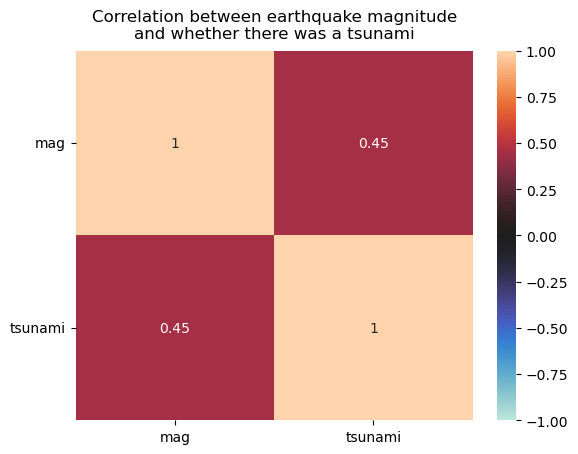

In [132]:
sns.heatmap(
    quakes.query('magType == "mb"')[['mag','tsunami']].corr(), 
    annot=True, center=0, vmin=-1, vmax=1
)
plt.yticks(rotation=0)
plt.title('Correlation between earthquake magnitude\nand whether there was a tsunami', y=1.01)

## 8
Perform a EDA for the covid dataset

## 9
Analyse the Facebook dataset